In [1]:
import pandas as pd
import numpy as np
import datetime

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
merged1 = pd.read_csv('new_data/merged_clean.csv', index_col=0)
print(merged1.shape)
merged2 = pd.read_csv('new_data/merged_clean_2.csv', index_col=0)
print(merged2.shape)
merged = merged1.append(merged2)
print(merged.shape)

(271100, 21)
(207447, 21)
(478547, 21)


/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/3283179314.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged1.append(merged2)


In [3]:
#drop duplicates
merged.drop_duplicates(inplace=True)

#drop all na
merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'Distance:'], how='all', inplace=True)
#merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'Distance:'], how='all', inplace=True)
merged.reset_index(inplace=True, drop=True)
merged.shape

(388692, 21)

In [4]:
merged.columns

Index(['name', 'year', 'type', 'date', 'result', 'gc', 'icon', 'race_ref',
       'race_name', 'race_detail', 'race_rank', 'distance', 'points',
       'Avg. speed winner:', 'Distance:', 'Parcours type:', 'ProfileScore:',
       'Vert. meters:', 'Startlist quality score:', 'Won how: ',
       'adjusted_points'],
      dtype='object')

In [30]:
merged['ProfileScore:'].value_counts()

13.000000     9104
12.000000     7000
14.000000     5973
11.000000     5631
17.000000     3894
              ... 
29.111111        4
538.000000       4
289.000000       1
259.000000       1
335.000000       1
Name: ProfileScore:, Length: 393, dtype: int64

In [6]:
#set date as datetime
merged['date'] = pd.to_datetime(merged['date'])

### Vertical meters

In [7]:
no_na = merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'distance'], how='any')

In [8]:
# profile score via vert and distance
X  = no_na[['Distance:', 'ProfileScore:']]
y = no_na['Vert. meters:']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeRegressor()

tree.fit(X_train_scaled, y_train)

tree.score(X_test_scaled, y_test)

0.9997351557955321

In [9]:
vert_na = merged[merged['Vert. meters:'].isna()]
vert_na.dropna(subset=['Distance:', 'ProfileScore:'], how='any', inplace=True)

X_pred = vert_na[['Distance:', 'ProfileScore:']]

X_pred_scaled = scaler.transform(X_pred)

vert_na['predicted_vert'] = tree.predict(X_pred_scaled)
vert_na

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/1125638154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vert_na.dropna(subset=['Distance:', 'ProfileScore:'], how='any', inplace=True)
/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/1125638154.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vert_na['predicted_vert'] = tree.predict(X_pred_scaled)


,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,points,Avg. speed winner:,Distance:,Parcours type:,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points,predicted_vert
5605,richard-carapaz,2020,etappe,2020-08-09,0,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
5606,luke-rowe,2020,etappe,2020-08-09,109,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
5607,maximilian-schachmann,2020,etappe,2020-08-09,24,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
5608,dries-devenyns,2020,etappe,2020-08-09,77,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
5609,rudy-molard,2020,etappe,2020-08-09,50,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280443,ivan-basso,2013,etappe,2013-04-19,17,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,8.0,38.23,166.8,p5,329.0,NaN,420,? - let us know!,1105440.0,4634.0
280444,leopold-konig,2013,etappe,2013-04-19,20,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,2.0,38.23,166.8,p5,329.0,NaN,420,? - let us know!,276360.0,4634.0
280445,jan-barta,2013,etappe,2013-04-19,58,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,0.0,38.23,166.8,p5,329.0,NaN,420,? - let us know!,0.0,4634.0
280446,david-de-la-cruz,2013,etappe,2013-04-19,24,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,0.0,38.23,166.8,p5,329.0,NaN,420,? - let us know!,0.0,4634.0


In [10]:
merged.loc[vert_na.index, 'Vert. meters:'] = vert_na['predicted_vert']

### Decision tree for profile score

In [11]:
#drop where either profile score or vert meters are missing
no_na = merged.dropna(subset=['ProfileScore:', 'Vert. meters:'], how='any')
print(no_na.shape)

#drop where score below 10 -> arbitrary point
no_na = no_na[no_na['ProfileScore:'] > 10]
print(no_na.shape)

(257974, 21)
(220014, 21)


In [12]:
# profile score via vert and distance
X  = no_na[['Distance:', 'Vert. meters:']]
y = no_na['ProfileScore:']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeRegressor()

tree.fit(X_train_scaled, y_train)

tree.score(X_test_scaled, y_test)

0.999951389752339

In [13]:
profile_na = merged[merged['ProfileScore:'].isna()]
smaller_ten = merged[merged['ProfileScore:'] <= 10]
impute_profile = profile_na.append(smaller_ten)
impute_profile.dropna(subset=['Distance:', 'Vert. meters:'], how='any', inplace=True)

X_pred = impute_profile[['Distance:', 'Vert. meters:']]

X_pred_scaled = scaler.transform(X_pred)

impute_profile['predicted_score'] = tree.predict(X_pred_scaled)
impute_profile

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/821046524.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  impute_profile = profile_na.append(smaller_ten)


,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,points,Avg. speed winner:,Distance:,Parcours type:,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points,predicted_score
3648,egan-bernal,2020,etappe,2020-08-01,6,8.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,30.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
3649,andrey-amador,2020,etappe,2020-08-01,77,77.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,0.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
3650,jonathan-castroviejo,2020,etappe,2020-08-01,75,75.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,0.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
3651,pavel-sivakov,2020,etappe,2020-08-01,40,41.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,0.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
3652,dylan-van-baarle,2020,etappe,2020-08-01,81,81.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,0.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380923,marcos-garcia,2010,etappe,2010-08-28,12,79.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,18.0,55.32,13.0,p1,0.0,33.0,1132,Time Trial,0.0,13.0
380924,vladimir-isaychev,2010,etappe,2010-08-28,12,75.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,18.0,55.32,13.0,p1,0.0,33.0,1132,Time Trial,0.0,13.0
380925,serafin-martinez,2010,etappe,2010-08-28,12,80.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,18.0,55.32,13.0,p1,0.0,33.0,1132,Time Trial,0.0,13.0
380926,gonzalo-rabunal-rios,2010,etappe,2010-08-28,12,81.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,18.0,55.32,13.0,p1,0.0,33.0,1132,Time Trial,0.0,13.0


In [14]:
merged.loc[impute_profile.index, 'ProfileScore:'] = impute_profile['predicted_score']

### KNN to impute parcours type

In [15]:
merged['Parcours type:'].value_counts()

p2    103706
p1     84824
p0     70583
p5     56511
p3     45573
p4     27495
Name: Parcours type:, dtype: int64

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

px0 = merged[merged['Parcours type:']!='p0']

px0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)

X = px0[['ProfileScore:', 'Vert. meters:']]

y = px0['Parcours type:']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

knn.score(X_test_scaled, y_test)


/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/977234109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  px0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)


0.992589609343536

In [17]:
p0 = merged[merged['Parcours type:']=='p0']

p0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)

X_pred = p0[['ProfileScore:', 'Vert. meters:']]

X_pred_scaled = scaler.transform(X_pred)

labels = knn.predict(X_pred_scaled)

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/1480808305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)


In [18]:
p0['adjusted parcours type'] = labels

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/2894937052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0['adjusted parcours type'] = labels


In [19]:
p0['adjusted parcours type'].value_counts()

p2    4671
p3    3198
p1    2661
p5    1161
p4    1012
Name: adjusted parcours type, dtype: int64

In [20]:
merged.loc[p0.index, 'Parcours type:'] = p0['adjusted parcours type']

In [21]:
merged['Parcours type:'].value_counts()

p2    108377
p1     87485
p0     57880
p5     57672
p3     48771
p4     28507
Name: Parcours type:, dtype: int64

In [22]:
merged.groupby('Parcours type:')[['Vert. meters:', 'ProfileScore:']].mean()

,Vert. meters:,ProfileScore:
Parcours type:,,
p0,NaN,NaN
p1,793.010439,25.371081
p2,2176.758425,86.535122
p3,2367.709159,110.532929
p4,3316.564598,182.654260
p5,3562.890991,279.793265


In [23]:
parcours = {
    'p1' : 'fl',
    'p2' : 'hi_fl',
    'p3' : 'hi_hi',
    'p4' : 'mo_fl',
    'p5' : 'mo_mo'
}

merged['Parcours type:'] = merged['Parcours type:'].map(parcours)

In [24]:
merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'distance'], how='any', inplace=True)
merged.shape

(261001, 21)

In [25]:
merged.to_csv('merged_treated.csv')

In [31]:
merged

,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,distance,points,Avg. speed winner:,Distance:,Parcours type:,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points
0,egan-bernal,2020,etappe,2020-09-16,0,NaN,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,0.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,0.0
1,andrey-amador,2020,etappe,2020-09-16,117,79.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,0.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,0.0
2,richard-carapaz,2020,etappe,2020-09-16,11,13.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,20.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,14962800.0
3,jonathan-castroviejo,2020,etappe,2020-09-16,116,40.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,0.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,0.0
4,michal-kwiatkowski,2020,etappe,2020-09-16,130,37.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,170.0,0.0,35.28,170.0,mo_mo,444.0,4430.0,1685,3.5 km solo,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380923,marcos-garcia,2010,etappe,2010-08-28,12,79.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,13.0,18.0,55.32,13.0,fl,13.0,33.0,1132,Time Trial,0.0
380924,vladimir-isaychev,2010,etappe,2010-08-28,12,75.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,13.0,18.0,55.32,13.0,fl,13.0,33.0,1132,Time Trial,0.0
380925,serafin-martinez,2010,etappe,2010-08-28,12,80.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,13.0,18.0,55.32,13.0,fl,13.0,33.0,1132,Time Trial,0.0
380926,gonzalo-rabunal-rios,2010,etappe,2010-08-28,12,81.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,13.0,18.0,55.32,13.0,fl,13.0,33.0,1132,Time Trial,0.0


### Test split data

In [40]:
vuelta_riders = merged[merged['race_name']=='vuelta-a-espana'][['name', 'year']]
vuelta_riders = vuelta_riders[vuelta_riders['year'] != 2021].values

In [41]:
def get_sequences(df, name, year, tour):
    
    #get tour data
    predict_data_filter = df[(df['name'] == name) & (df['year'] == year) & (df['race_name'] == tour)].sort_values(by='date')
    predict_data_x = predict_data_filter[['date', 'distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']].set_index('date').T
    predict_data_y = predict_data_filter[['date', 'points']].set_index('date').T
    
    #get year before
    train_data_filter = df[(df['name'] == name) & (df['date'] < min(predict_data_filter['date'])) & (df['date'] >= min(predict_data_filter['date']) - datetime.timedelta(weeks=52))].sort_values(by='date')
    train_data_x = train_data_filter[['date', 'distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']].set_index('date').T
    train_data_y = train_data_filter[['date', 'points']].set_index('date').T
    
    return predict_data_x, predict_data_y, train_data_x, train_data_y

In [42]:
X, y = [], []

for rider, year in vuelta_riders:
        
    predict_data_x, predict_data_y, train_data_x, train_data_y = get_sequences(merged, rider, year, 'vuelta-a-espana')
    
    X.append(train_data_x.to_numpy())
    y.append(train_data_y.to_numpy())
    
    print(rider, year)
    



andrey-amador 2020
richard-carapaz 2020
dylan-van-baarle 2020
primoz-roglic 2020
george-bennett 2020
robert-gesink 2020
sepp-kuss 2020
felix-grossschartner 2020
nans-peters 2020
sam-bennett 2020
remi-cavagna 2020
michael-morkov 2020
david-gaudu 2020
wout-poels 2020
hugh-carthy 2020
tejay-van-garderen 2020
alejandro-valverde 2020
imanol-erviti 2020
enric-mas 2020
nelson-oliveira 2020
jose-joaquin-rojas 2020
marc-soler 2020
carlos-verona 2020
niklas-eg 2020
jan-hirt 2020
guillaume-martin 2020
pierre-luc-perichon 2020
david-de-la-cruz 2020
davide-formolo 2020
omar-fraile 2020
gorka-izagirre 2020
ion-izagirre 2020
johan-esteban-chaves 2020
mikel-nieve 2020
dan-martin 2020
romain-sicard 2020
michael-valgren-andersen 2020
aleksandr-vlasov 2020
andrey-amador 2020
richard-carapaz 2020
dylan-van-baarle 2020
primoz-roglic 2020
george-bennett 2020
robert-gesink 2020
sepp-kuss 2020
felix-grossschartner 2020
nans-peters 2020
sam-bennett 2020
remi-cavagna 2020
michael-morkov 2020
david-gaudu 2020
wo

In [43]:
import torch

torch.save(X, 'torch_data/X.pt')
torch.save(y, 'torch_data/y.pt')

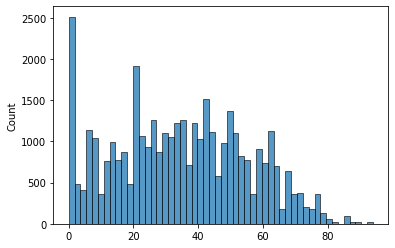

In [44]:
import seaborn as sns
sns.histplot([x.shape[1] for x in X]);

In [46]:
X2 = []
y2 = []

for xx, yy in zip(X, y):
    if xx.shape == (4,0):
        pass
    else:
        X2.append(xx)
        y2.append(yy)
    

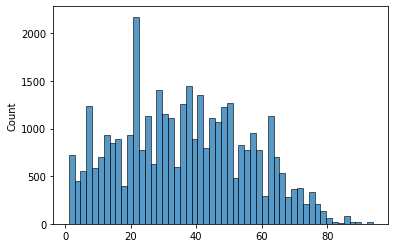

In [47]:
import seaborn as sns
sns.histplot([x.shape[1] for x in X2]);

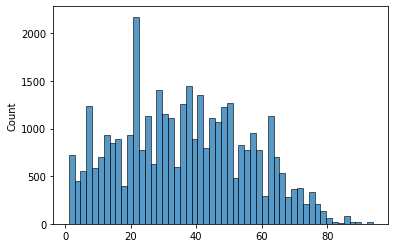

In [48]:
sns.histplot([y.shape[1] for y in y2]);

In [51]:
from keras.preprocessing.sequence import pad_sequences

In [59]:
X3 = []
y3 = []

for x in X2:
    X3.append(pad_sequences(x, maxlen=60, dtype='float', padding='post', value=9999))
    
for y in y2:
    y3.append(pad_sequences(y, maxlen=60, dtype='float', padding='post', value=9999))

In [60]:
X3 = np.array(X3)
y3 = np.array(y3)

In [61]:
torch.save(X3, 'torch_data/X_padded.pt')
torch.save(y3, 'torch_data/y_padded.pt')